In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries

### Step 4: Research a stock for each below that reflects the following industries

In [2]:
import requests

#Juliet Gaithuru
API_KEY = 'DAXRSK4WN54W5H09'

1. american company:  FB Meta Platforms Inc

2. canadina company: SHOP.TRT - shopify

3. precious metals - GFI  - Gold Fields Ltd

4. real estate : CIGI - Colliers International Group Stock

5. travel sector : BKNG -  Booking Holdings Inc

In [3]:
df = pd.read_csv("aggregated_data.csv")
df.columns = ["Date", "Total deaths", "Total confirmed"]
df

,Date,Total deaths,Total confirmed
0,1/22/20,17,557
1,1/23/20,18,657
2,1/24/20,26,944
3,1/25/20,42,1437
4,1/26/20,56,2120
...,...,...,...
816,4/17/22,6198487,504619899
817,4/18/22,6199914,505089291
818,4/19/22,6203317,506082451
819,4/20/22,6207815,507046645


In [4]:
from datetime import datetime
# Below are quick example
# Convert datetype to string
df['Date']=df['Date'].astype(str)
df['Date']=pd.to_datetime(df['Date'].astype(str))

df


,Date,Total deaths,Total confirmed
0,2020-01-22,17,557
1,2020-01-23,18,657
2,2020-01-24,26,944
3,2020-01-25,42,1437
4,2020-01-26,56,2120
...,...,...,...
816,2022-04-17,6198487,504619899
817,2022-04-18,6199914,505089291
818,2022-04-19,6203317,506082451
819,2022-04-20,6207815,507046645


In [5]:
df.set_index('Date', inplace=True)
df

,Total deaths,Total confirmed
Date,,
2020-01-22,17,557
2020-01-23,18,657
2020-01-24,26,944
2020-01-25,42,1437
2020-01-26,56,2120
...,...,...
2022-04-17,6198487,504619899
2022-04-18,6199914,505089291
2022-04-19,6203317,506082451


### Step 5: Use AlphaVantage to get the daily high and low prices for your selected stocks

### Colliers International Group Stock

In [6]:
ts = TimeSeries(key='API_KEY', output_format='pandas')
data, meta = ts.get_daily(symbol='CIGI',outputsize='full')

data.sort_values(by='date', ascending=True, inplace=True)
data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
1999-11-01,11.8750,11.8750,11.3750,11.3750,23250.0
1999-11-02,11.3750,11.3750,11.2500,11.3750,19800.0
1999-11-03,11.3750,11.5000,11.1250,11.1250,68000.0
1999-11-04,11.1250,11.1875,10.9375,10.9375,43900.0
1999-11-05,10.9375,11.0000,10.7500,10.7500,54000.0
...,...,...,...,...,...
2022-04-18,122.2500,123.0500,119.9700,121.8400,59693.0
2022-04-19,122.3600,124.8000,122.3600,124.3400,71502.0
2022-04-20,124.5200,128.0200,124.5200,125.5400,71296.0


In [7]:
data.tail(3)
data = data.drop(index='2022-04-22')
data.tail(3)

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2022-04-19,122.36,124.80,122.36,124.34,71502.0
2022-04-20,124.52,128.02,124.52,125.54,71296.0
2022-04-21,128.17,128.17,122.22,122.90,73775.0


In [8]:
data = data.drop(data.index[0:5086])



In [9]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-01-21,84.20,84.20,81.61,81.67,73721.0
2020-01-22,82.33,82.56,81.68,81.84,42707.0
2020-01-23,81.20,82.14,80.91,81.85,67232.0
2020-01-24,82.01,82.24,81.14,81.39,25944.0
2020-01-27,80.22,81.71,79.81,81.61,31782.0


In [10]:
data.columns = ["open", "CIGI-High", "CIGI-Low", "close" ,"volume"]
data

,open,CIGI-High,CIGI-Low,close,volume
date,,,,,
2020-01-21,84.20,84.20,81.61,81.67,73721.0
2020-01-22,82.33,82.56,81.68,81.84,42707.0
2020-01-23,81.20,82.14,80.91,81.85,67232.0
2020-01-24,82.01,82.24,81.14,81.39,25944.0
2020-01-27,80.22,81.71,79.81,81.61,31782.0
...,...,...,...,...,...
2022-04-14,126.28,127.05,122.25,122.31,69347.0
2022-04-18,122.25,123.05,119.97,121.84,59693.0
2022-04-19,122.36,124.80,122.36,124.34,71502.0


In [11]:
data = data.drop(["open","close","volume"], axis=1)
data

,CIGI-High,CIGI-Low
date,,
2020-01-21,84.20,81.61
2020-01-22,82.56,81.68
2020-01-23,82.14,80.91
2020-01-24,82.24,81.14
2020-01-27,81.71,79.81
...,...,...
2022-04-14,127.05,122.25
2022-04-18,123.05,119.97
2022-04-19,124.80,122.36


 ### Step 6: Append that info to the data frame created in step 3

In [12]:
#To keep only the filled data - and remove empty cells
real_res = pd.concat([data, df], axis=1, join="inner")
real_res

,CIGI-High,CIGI-Low,Total deaths,Total confirmed
2020-01-22,82.56,81.68,17,557
2020-01-23,82.14,80.91,18,657
2020-01-24,82.24,81.14,26,944
2020-01-27,81.71,79.81,82,2929
2020-01-28,82.40,80.96,131,5580
...,...,...,...,...
2022-04-14,127.05,122.25,6193401,502932802
2022-04-18,123.05,119.97,6199914,505089291
2022-04-19,124.80,122.36,6203317,506082451
2022-04-20,128.02,124.52,6207815,507046645


### Step 7: Create an appropriate graph detailing your info - explain why you chose the graphs you did, use matplotlib

We use matplotlib with subplots, on a $2 \times 1$ dimension,i.e., 2 rows and 1 column. The first graph shows the total confirmed cases and deaths arising from Covid. The second graph shows the highs and lows in stock prices, therefore it is easy to observe how covid affected the Colliers stock prices on a daya-to-day basis.

<Figure size 1440x1440 with 0 Axes>

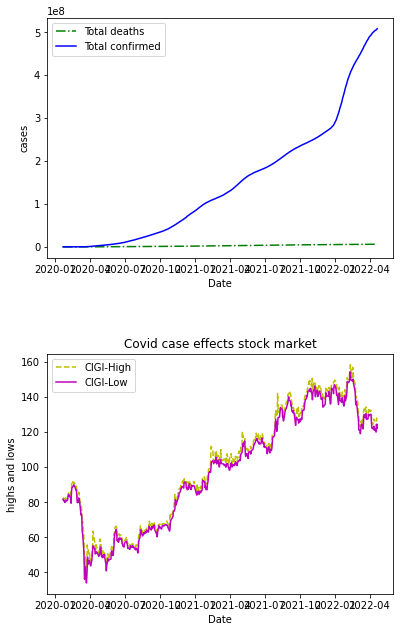

In [13]:
x = np.arange(0, 565,1)


s1 = real_res["Total deaths"]
s2 = real_res["Total confirmed"]
s3 = real_res["CIGI-High"]
s4 = real_res["CIGI-Low"]

plt.figure(figsize=(20,20))
fig, axs = plt.subplots(2, 1)
axs[0].plot(s1, 'g-.', label="Total deaths")
axs[0].plot(s2, 'b-', label="Total confirmed")
axs[0].set_xlabel('Date')
axs[0].set_ylabel('cases')               
axs[0].legend()

axs[1].plot(s3, 'y--', label="CIGI-High")
axs[1].plot(s4, 'm', label="CIGI-Low")
axs[1].set_xlabel('Date')
axs[1].set_ylabel('highs and lows')
axs[1].legend()




plt.subplots_adjust(left=0.1,
                    bottom=0, 
                    right=0.9, 
                    top=2, 
                    wspace=0.4, 
                    hspace=0.4)
plt.title("Covid case effects stock market")

plt.show()

